In [1]:
from functions import *

In [2]:
get_list_of_zip_files(directory="C:\\Users\\KonuTech")[0:2]

['home-data-for-ml-course.zip',
 'house-prices-advanced-regression-techniques.zip']

In [3]:
unzip_files(directory="C:\\Users\\KonuTech"
            ,output_directory="C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques"
            ,zip_file_name="house-prices-advanced-regression-techniques.zip")

Unpacked house-prices-advanced-regression-techniques.zip to: C:\Users\KonuTech\Downloads\house-prices-advanced-regression-techniques



In [4]:
change_current_working_directory(directory="C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques")

'C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques'

In [5]:
get_list_of_files_by_extension(directory="C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques"
                               ,extension="csv")

['sample_submission.csv', 'submission.csv', 'test.csv', 'train.csv']

# Data description

In [6]:
#f = open("data_description.txt", "r")
#print(f.read())

# Train data

In [7]:
train = pd.read_csv('train.csv')
train = train.drop(columns="Id", axis=1)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

In [8]:
train.shape

(1460, 80)

### Transformation of Int columns to Float columns

In [9]:
train[train.select_dtypes(include=['int64']).columns] = train[train.select_dtypes(include=['int64']).columns].astype(float)

In [10]:
round(train.describe(),2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [11]:
train.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


# DEALING WITH NULL VALUES

#### Number of columns with Null values

In [12]:
(train.isnull().sum() > 0).sum()

19

### Summary statistics of mising data

#### Counts

In [13]:
missing_data_count = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
missing_data_count.T

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageType,GarageCond,GarageFinish,GarageQual,GarageYrBlt,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,MasVnrType,Electrical,RoofMatl,Exterior1st,RoofStyle,ExterQual,Exterior2nd,YearBuilt,ExterCond,Foundation,YearRemodAdd,SalePrice,OverallCond,OverallQual,HouseStyle,BldgType,Condition2,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Street,LotArea,MSZoning,BsmtFinSF1,HeatingQC,BsmtFinSF2,EnclosedPorch,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,BsmtUnfSF,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,Functional,TotRmsAbvGrd,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,TotalBsmtSF,MSSubClass
0,1453,1406,1369,1179,690,259,81,81,81,81,81,38,38,37,37,37,8,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
round(missing_data_count[missing_data_count > 0].describe(),3).T

,count,mean,std,min,25%,50%,75%,max
0,19.0,366.579,546.816,1.0,37.0,81.0,474.5,1453.0


#### Percetages

In [15]:
missing_data_percentage = pd.DataFrame(((train.isnull().sum().sort_values(ascending=False))/train.shape[0]))
missing_data_percentage.T

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageType,GarageCond,GarageFinish,GarageQual,GarageYrBlt,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,MasVnrType,Electrical,RoofMatl,Exterior1st,RoofStyle,ExterQual,Exterior2nd,YearBuilt,ExterCond,Foundation,YearRemodAdd,SalePrice,OverallCond,OverallQual,HouseStyle,BldgType,Condition2,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Street,LotArea,MSZoning,BsmtFinSF1,HeatingQC,BsmtFinSF2,EnclosedPorch,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,BsmtUnfSF,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,Functional,TotRmsAbvGrd,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,TotalBsmtSF,MSSubClass
0,0.995205,0.963014,0.937671,0.807534,0.472603,0.177397,0.055479,0.055479,0.055479,0.055479,0.055479,0.026027,0.026027,0.025342,0.025342,0.025342,0.005479,0.005479,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
round(missing_data_percentage[missing_data_percentage > 0].describe(),3).T

,count,mean,std,min,25%,50%,75%,max
0,19.0,0.251,0.375,0.001,0.025,0.055,0.325,0.995


# Imputation of Null values

## Floats columns imputation

### Find float columns with missing values

In [17]:
floats_with_nulls = pd.DataFrame(train.select_dtypes(include=['float64']).isnull().sum()) > 0
floats_with_nulls = floats_with_nulls[floats_with_nulls[0] == True].T.columns
floats_with_nulls

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

### Print counts of unique values including Null values

In [18]:
count_unique_values(dataframe=train
                    ,variables=floats_with_nulls)

LotFrontage count distinct:
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
38.0       1
138.0      1
140.0      1
137.0      1
nan      259
Length: 111, dtype: int64

MasVnrArea count distinct:
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
337.0      1
415.0      1
293.0      1
621.0      1
nan        8
Length: 328, dtype: int64

GarageYrBlt count distinct:
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1933.0     1
1900.0     1
1906.0     1
nan       81
Length: 98, dtype: int64



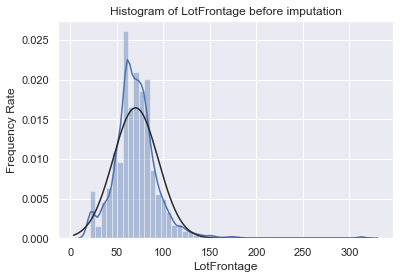

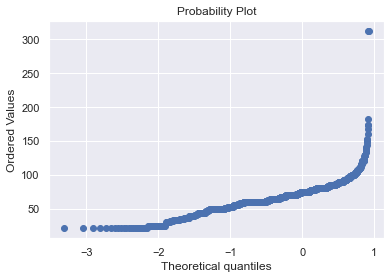

<Figure size 432x288 with 0 Axes>

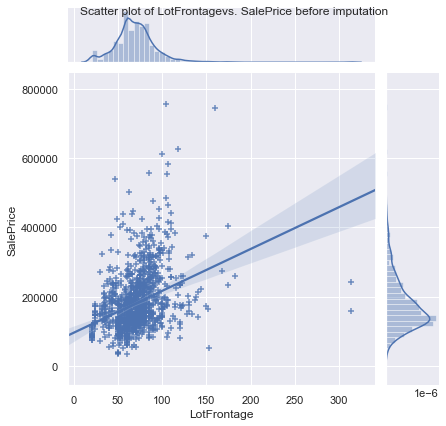

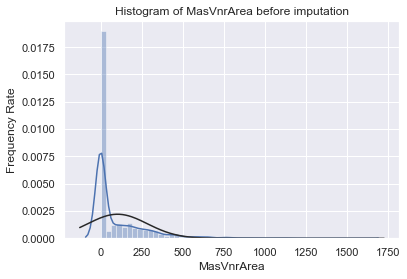

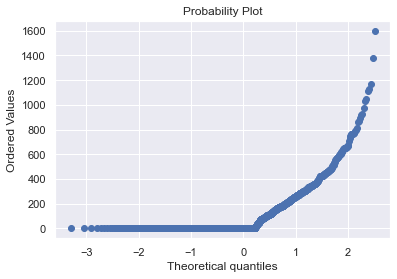

<Figure size 432x288 with 0 Axes>

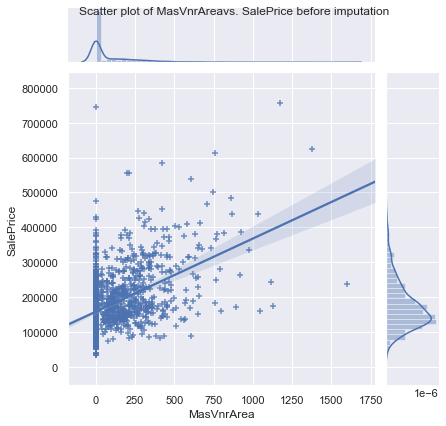

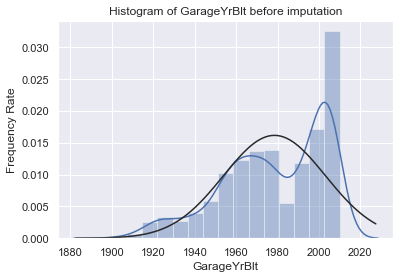

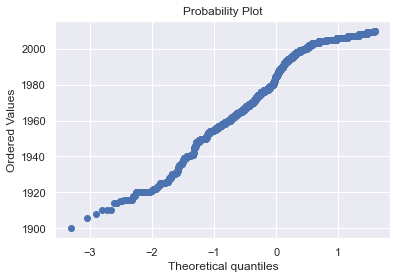

<Figure size 432x288 with 0 Axes>

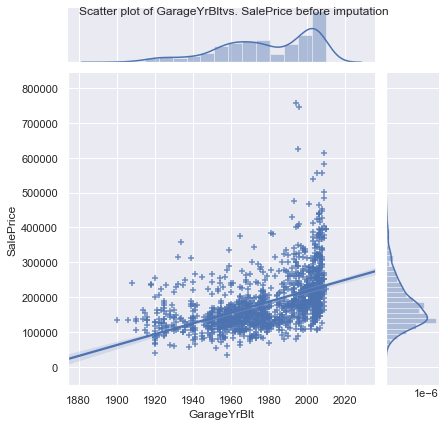

<Figure size 432x288 with 0 Axes>

In [19]:
visualise_floats(dataframe=train
          ,variables=floats_with_nulls
          ,target="SalePrice")

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


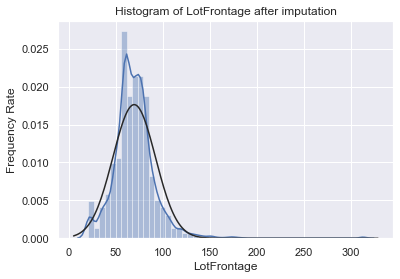

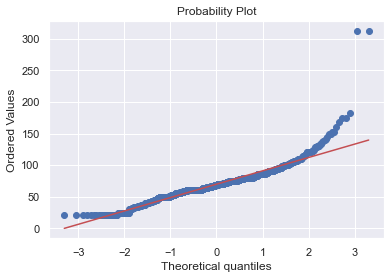

<Figure size 432x288 with 0 Axes>

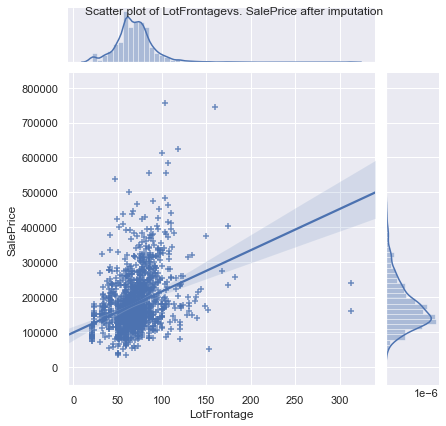

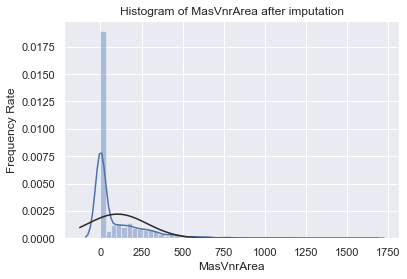

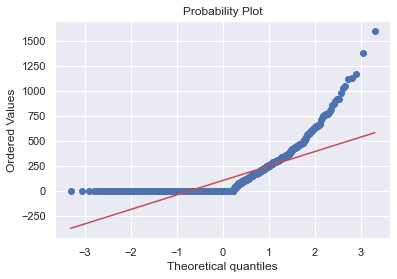

<Figure size 432x288 with 0 Axes>

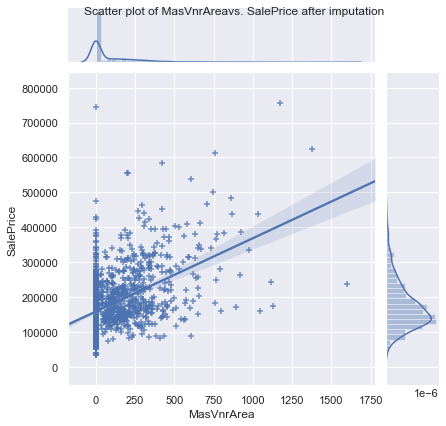

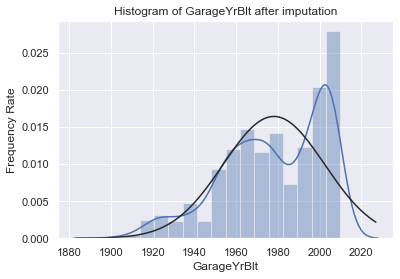

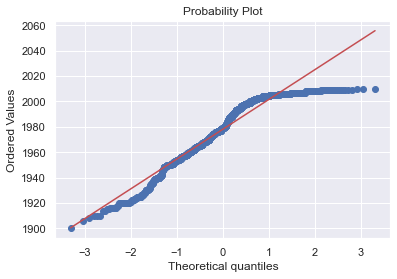

<Figure size 432x288 with 0 Axes>

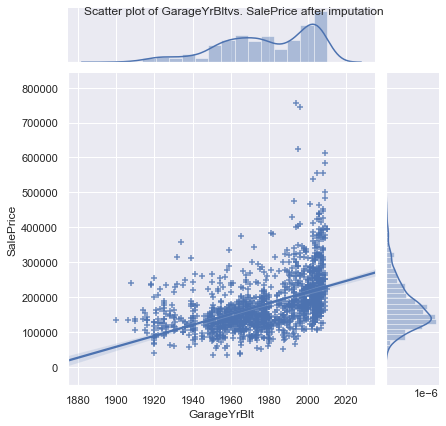

<Figure size 432x288 with 0 Axes>

In [20]:
floats_without_nulls = choose_imputer_and_visualise_floats(dataframe=train
                                                           ,variables=floats_with_nulls
                                                           ,target="SalePrice"
                                                           ,imputer=KNNImputer
                                                           ,strategy=None
                                                           ,weights="distance")
floats_without_nulls

### Summary statistics of Floats before imputation

In [21]:
train[floats_with_nulls].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [22]:
before = pd.DataFrame(train[floats_with_nulls].isnull().sum())
before.T

,LotFrontage,MasVnrArea,GarageYrBlt
0,259,8,81


### Summary statistics of Floats after imputation

In [23]:
floats_without_nulls.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.000000,1460.000000,1460.000000
mean,69.601956,103.605031,1978.088324
std,22.624028,180.689072,24.317955
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,68.539288,0.000000,1979.000000
75%,80.000000,165.250000,2001.000000
max,313.000000,1600.000000,2010.000000


In [24]:
after = pd.DataFrame(floats_without_nulls.isnull().sum())
after.T

,LotFrontage,MasVnrArea,GarageYrBlt
0,0,0,0


## Category columns imputation

## Find Category columns with null values

In [25]:
category_with_nulls = pd.DataFrame(train.select_dtypes(include=['object']).isnull().sum()) > 0
category_with_nulls = category_with_nulls[category_with_nulls[0] == True].T.columns
category_with_nulls

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

### Print counts of unique values including Null values

In [26]:
count_unique_values(dataframe=train
                    ,variables=category_with_nulls)

Alley count distinct:
Grvl      50
Pave      41
nan     1369
dtype: int64

MasVnrType count distinct:
None       864
BrkFace    445
Stone      128
BrkCmn      15
nan          8
dtype: int64

BsmtQual count distinct:
TA     649
Gd     618
Ex     121
Fa      35
nan     37
dtype: int64

BsmtCond count distinct:
TA     1311
Gd       65
Fa       45
Po        2
nan      37
dtype: int64

BsmtExposure count distinct:
No     953
Av     221
Gd     134
Mn     114
nan     38
dtype: int64

BsmtFinType1 count distinct:
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
nan     37
dtype: int64

BsmtFinType2 count distinct:
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
nan      38
dtype: int64

Electrical count distinct:
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
nan         1
dtype: int64

FireplaceQu count distinct:
Gd     380
TA     313
Fa      33
Ex      24
Po      20
nan    690
dtype: int64

GarageType count distinct:
Attchd     

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,Grvl,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,Gd,MnPrv,Shed
1,Grvl,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Gd,MnPrv,Shed
2,Grvl,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Gd,MnPrv,Shed
3,Grvl,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,Gd,MnPrv,Shed
4,Grvl,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Gd,MnPrv,Shed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Grvl,None,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Gd,MnPrv,Shed
1456,Grvl,Stone,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,Unf,TA,TA,Gd,MnPrv,Shed
1457,Grvl,None,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,Gd,GdPrv,Shed
1458,Grvl,None,TA,TA,Mn,GLQ,Rec,FuseA,Gd,Attchd,Unf,TA,TA,Gd,MnPrv,Shed


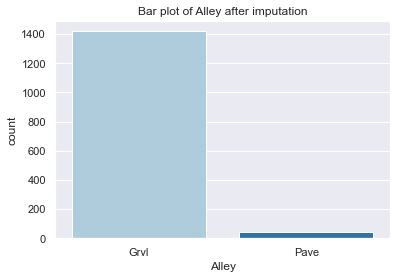

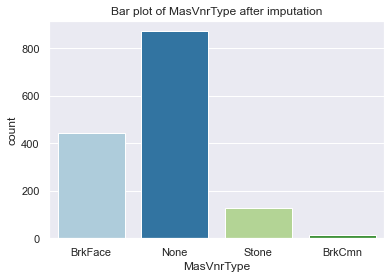

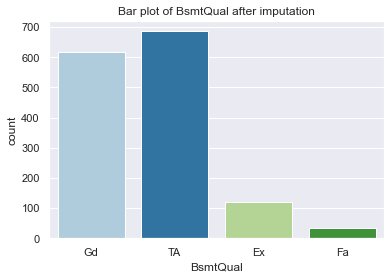

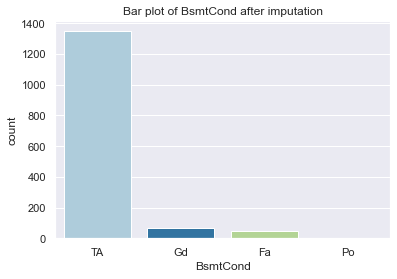

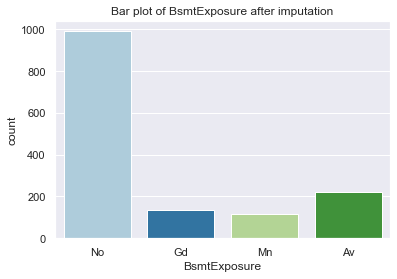

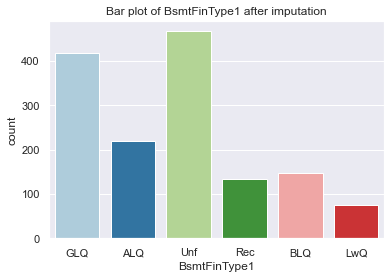

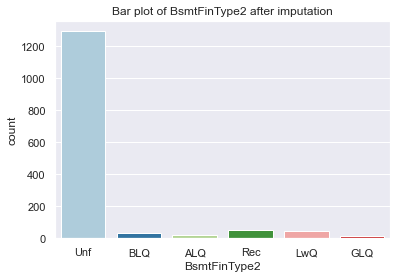

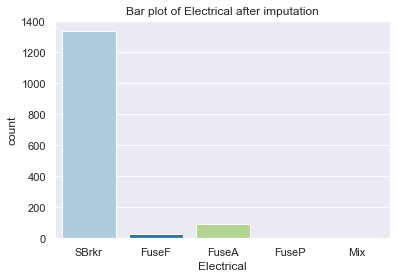

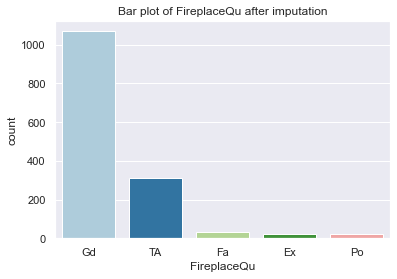

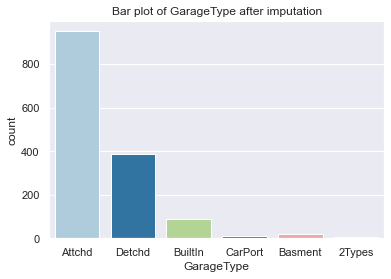

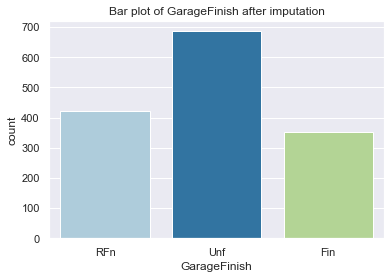

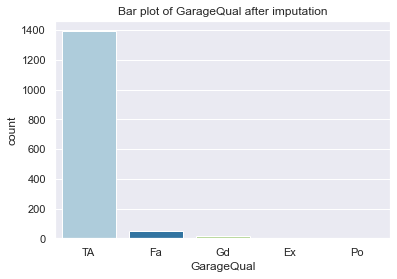

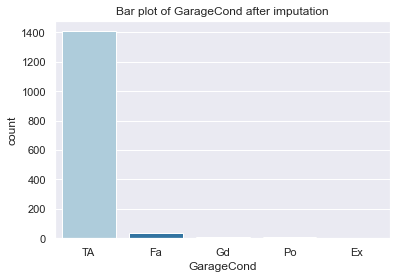

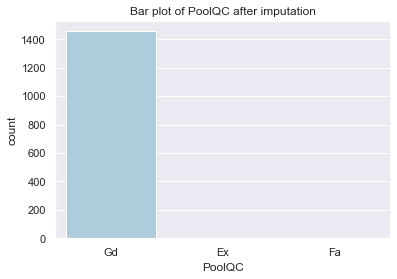

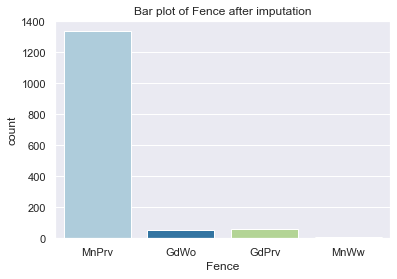

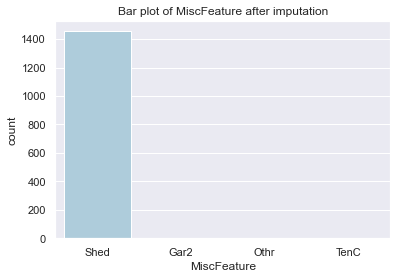

<Figure size 432x288 with 0 Axes>

In [27]:
category_without_nulls = choose_imputer_and_visualise_categories(dataframe=train
                                                                ,variables=category_with_nulls
                                                                ,target=None
                                                                ,imputer=SimpleImputer
                                                                ,strategy="most_frequent"
                                                                ,weights=None)
category_without_nulls

### Summary statistics of Categories before imputation

In [28]:
train[category_with_nulls].describe()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
count,91,1452,1423,1423,1422,1423,1422,1459,770,1379,1379,1379,1379,7,281,54
unique,2,4,4,4,4,6,6,5,5,6,3,5,5,3,4,4
top,Grvl,None,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,Unf,TA,TA,Gd,MnPrv,Shed
freq,50,864,649,1311,953,430,1256,1334,380,870,605,1311,1326,3,157,49


In [29]:
before = pd.DataFrame(train[category_with_nulls].isnull().sum())
before.T

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,1369,8,37,37,38,37,38,1,690,81,81,81,81,1453,1179,1406


### Summary statistics of Categories after imputation

In [30]:
category_without_nulls.describe()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,2,4,4,4,4,6,6,5,5,6,3,5,5,3,4,4
top,Grvl,None,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,Unf,TA,TA,Gd,MnPrv,Shed
freq,1419,872,686,1348,991,467,1294,1335,1070,951,686,1392,1407,1456,1336,1455


In [31]:
after = pd.DataFrame(category_without_nulls.isnull().sum())
after.T

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Replacing original columns with imputed one

#### Replacing Floats

In [32]:
floats_without_nulls.columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [33]:
train[floats_without_nulls.columns] = floats_without_nulls

#### Replacing Categories

In [34]:
category_without_nulls.columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [35]:
train[category_without_nulls.columns] = category_without_nulls

# DUMMY VARIABLES

In [36]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Gd,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,RL,62.0,7917.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,5.0,1999.0,2000.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,7.0,Typ,1.0,TA,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0.0,40.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,8.0,2007.0,WD,Normal,175000.0
1456,20.0,RL,85.0,13175.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6.0,6.0,1978.0,1988.0,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,TA,7.0,Min1,2.0,TA,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349.0,0.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,2.0,2010.0,WD,Normal,210000.0
1457,70.0,RL,66.0,9042.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,

In [37]:
target = train.iloc[:,-1]

In [38]:
target

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [39]:
train = train.iloc[:,:-1]

In [40]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,RL,65.0,8450.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Gd,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,2.0,2008.0,WD,Normal
1,20.0,RL,80.0,9600.0,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,5.0,2007.0,WD,Normal
2,60.0,RL,68.0,11250.0,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,9.0,2008.0,WD,Normal
3,70.0,RL,60.0,9550.0,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,2.0,2006.0,WD,Abnorml
4,60.0,RL,84.0,14260.0,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,RL,62.0,7917.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,5.0,1999.0,2000.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,7.0,Typ,1.0,TA,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0.0,40.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,8.0,2007.0,WD,Normal
1456,20.0,RL,85.0,13175.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6.0,6.0,1978.0,1988.0,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,TA,7.0,Min1,2.0,TA,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349.0,0.0,0.0,0.0,0.0,0.0,Gd,MnPrv,Shed,0.0,2.0,2010.0,WD,Normal
1457,70.0,RL,66.0,9042.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,9.0,1941.0,2006.0,Gable,CompShg,CemntBd

In [41]:
categories = pd.DataFrame(train.select_dtypes(include=['object']))
categories

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [42]:
categories.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,1419,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,686,1348,991,467,1294,1428,741,1365,1335,735,1360,1070,951,686,1392,1407,1340,1456,1336,1455,1267,1198


### One-hot encoding

In [43]:
one_hot_encode_cols = categories.dtypes[categories.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
pd.DataFrame(one_hot_encode_cols).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition


In [44]:
train = pd.get_dummies(data=train
                       ,columns=one_hot_encode_cols
                       ,drop_first=True)


In [45]:
train.shape

(1460, 245)

In [46]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.

### Log transforming skew variables

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 245 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(36), uint8(209)
memory usage: 708.7 KB


#### Transformation of Int columns to Float columns

In [48]:
train[train.select_dtypes(include=['uint8']).columns] = train[train.select_dtypes(include=['uint8']).columns].astype(float)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 245 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(245)
memory usage: 2.7 MB


In [50]:
mask = train.dtypes == np.float
float_columns = train.columns[mask]

skew_limit = 0.75
skew_values = train[float_columns].skew()
skew_values

MSSubClass                1.407657
LotFrontage               2.245801
LotArea                  12.207688
OverallQual               0.216944
OverallCond               0.693067
                           ...    
SaleCondition_AdjLand    19.045943
SaleCondition_Alloca     10.905010
SaleCondition_Family      8.376038
SaleCondition_Normal     -1.672412
SaleCondition_Partial     2.965079
Length: 245, dtype: float64

In [51]:
skew_columns = (skew_values
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns={0:'Skew'})
                .query('abs(Skew) > {}'.format(skew_limit)))

skew_columns.T

,RoofMatl_Metal,ExterCond_Po,RoofMatl_Membran,HeatingQC_Po,Electrical_Mix,Condition2_PosA,Exterior2nd_Other,Functional_Sev,Utilities_NoSeWa,Condition2_RRAn,Exterior1st_AsphShn,Exterior1st_ImStucc,Condition2_RRAe,RoofMatl_Roll,Exterior1st_CBlock,Exterior2nd_CBlock,MiscFeature_TenC,Heating_OthW,RoofStyle_Shed,Exterior1st_Stone,PoolQC_Fa,MiscFeature_Othr,Neighborhood_Blueste,Condition2_PosN,Exterior1st_BrkComm,BsmtCond_Po,SaleType_Con,Condition1_RRNe,Condition2_RRNn,MiscVal,Foundation_Wood,SaleType_Oth,Exterior2nd_AsphShn,GarageQual_Po,Electrical_FuseP,SaleType_CWD,Heating_Wall,SaleCondition_AdjLand,LotConfig_FR3,SaleType_ConLI,Functional_Maj2,Condition1_RRNn,Exterior2nd_Stone,SaleType_ConLw,RoofMatl_WdShake,Condition2_Feedr,RoofMatl_WdShngl,Foundation_Stone,PoolArea,GarageCond_Po,RoofStyle_Mansard,Exterior2nd_Brk Cmn,Heating_Grav,Condition1_PosA,HouseStyle_2.5Fin,SaleType_ConLD,GarageType_CarPort,GarageCond_Gd,Neighborhood_NPkVill,LotArea,Exterior2nd_ImStucc,LotShape_IR3,RoofMatl_Tar&Grv,Fence_MnWw,HouseStyle_2.5Unf,Neighborhood_Veenker,RoofStyle_Gambrel,Condition1_RRAe,SaleCondition_Alloca,LandSlope_Sev,3SsnPorch,GarageQual_Gd,ExterQual_Fa,HouseStyle_1.5Unf,BsmtFinType2_GLQ,Functional_Mod,Neighborhood_BrDale,MSZoning_RH,Neighborhood_MeadowV,LowQualFinSF,Heating_GasW,Condition1_PosN,GarageType_Basment,SaleCondition_Family,FireplaceQu_Po,Foundation_Slab,Exterior1st_Stucco,Exterior2nd_BrkFace,Neighborhood_StoneBr,Neighborhood_SWISU,Exterior2nd_Stucco,Exterior1st_WdShing,Condition1_RRAn,Electrical_FuseF,ExterCond_Fa,Neighborhood_ClearCr,PavedDrive_P,BldgType_2fmCon,Functional_Min1,BsmtFinType2_BLQ,FireplaceQu_Fa,Functional_Min2,GarageCond_Fa,BsmtQual_Fa,LandContour_Low,HouseStyle_SFoyer,Neighborhood_IDOTRR,Neighborhood_Timber,Exterior2nd_Wd Shng,KitchenQual_Fa,Neighborhood_NoRidge,Alley_Pave,LotShape_IR2,BldgType_Twnhs,BsmtFinType2_LwQ,LotConfig_FR2,GarageQual_Fa,HeatingQC_Fa,Neighborhood_Mitchel,LandContour_HLS,Exterior1st_BrkFace,Neighborhood_Crawfor,BldgType_Duplex,Fence_GdWo,BsmtFinType2_Rec,Neighborhood_BrkSide,Neighborhood_SawyerW,Exterior2nd_CmentBd,Exterior1st_CemntBd,KitchenAbvGr,MSZoning_FV,BsmtCond_Gd,LandSlope_Mod,HouseStyle_SLvl,BsmtFinSF2,Neighborhood_NWAmes,ScreenPorch,BsmtHalfBath,Neighborhood_Sawyer,BsmtFinType1_LwQ,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Feedr,Neighborhood_Somerst,GarageType_BuiltIn,LotConfig_CulDSac,Neighborhood_Edwards,Exterior1st_Plywood,Neighborhood_OldTown,BsmtExposure_Mn,BldgType_TwnhsE,EnclosedPorch,SaleType_New,SaleCondition_Partial,MasVnrType_Stone,BsmtFinType1_Rec,BsmtExposure_Gd,Exterior2nd_Plywood,MasVnrArea,ExterCond_Gd,BsmtFinType1_BLQ,Neighborhood_CollgCr,OpenPorchSF,LotFrontage,Exterior2nd_Wd Sdng,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,MSZoning_RM,Exterior1st_MetalSd,Exterior1st_HdBoard,Neighborhood_NAmes,HeatingQC_Gd,BsmtFinSF1,WoodDeckSF,RoofStyle_Hip,TotalBsmtSF,MSSubClass,FireplaceQu_TA,1stFlrSF,GrLivArea,GarageType_Detchd,BsmtFinType1_GLQ,GarageFinish_RFn,BsmtUnfSF,HeatingQC_TA,MasVnrType_BrkFace,HouseStyle_2Story,2ndFlrSF,BsmtFinType1_Unf,BsmtExposure_No,LotConfig_Inside,FireplaceQu_Gd,RoofStyle_Gable,MSZoning_RL,SaleCondition_Normal,Condition1_Norm,SaleType_WD,ExterCond_TA,BsmtFinType2_Unf,LandContour_Lvl,Electrical_SBrkr,Fence_MnPrv,PavedDrive_Y,BsmtCond_TA,Functional_Typ,CentralAir_Y,GarageQual_TA,GarageCond_TA,Heating_GasA,RoofMatl_CompShg,Condition2_Norm,Street_Pave,MiscFeature_Shed,PoolQC_Gd
Skew,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,24.476794,22.015094,22.015094,22.015094,22.015094,22.015094,19.045943,19.045943,19.045943,19.045943,17.01759,17.01759,17.01759,17.01759,17.01759,17.01759,15.51877,15.51877,15.51877,14.828374,14.35268,14.35268,14.35268,14.35268,13.41175,13.41175,12.631556,12.63

### Distributions of measures most extreme before log transformations

In [52]:
skew_columns.loc["RoofMatl_Metal"]

Skew    38.209946
Name: RoofMatl_Metal, dtype: float64

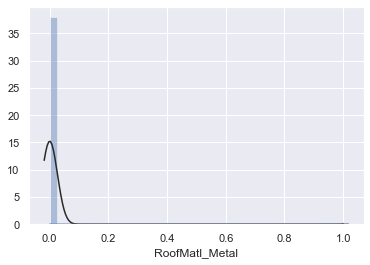

In [53]:
sns.distplot(train["RoofMatl_Metal"], fit=norm)

In [54]:
skew_columns.loc["PoolQC_Gd"]

Skew   -19.045943
Name: PoolQC_Gd, dtype: float64

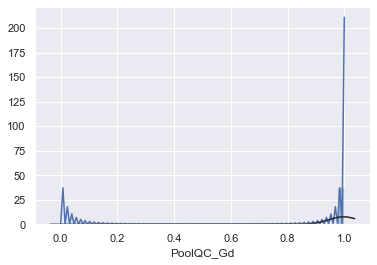

In [55]:
sns.distplot(train["PoolQC_Gd"], fit=norm)

### Log transforms

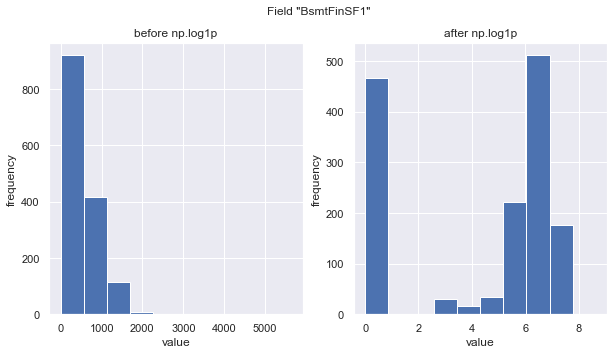

In [56]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "BsmtFinSF1"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
train[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
train[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [57]:
# Perform the skew transformation:

for column in skew_columns.index.values:
    if column == "SalePrice":
        continue
    train[column] = train[column].apply(np.log1p)

In [58]:
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7.0,5.0,2003.0,2003.0,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,1.0,0.000000,2.0,1.0,3.0,0.6

In [59]:
mask = train.dtypes == np.float
float_columns = train.columns[mask]

skew_limit = 0.75
skew_values = train[float_columns].skew()
skew_values

MSSubClass                0.248997
LotFrontage              -0.758119
LotArea                  -0.137404
OverallQual               0.216944
OverallCond               0.693067
                           ...    
SaleCondition_AdjLand    19.045943
SaleCondition_Alloca     10.905010
SaleCondition_Family      8.376038
SaleCondition_Normal     -1.672412
SaleCondition_Partial     2.965079
Length: 245, dtype: float64

In [60]:
skew_columns = (skew_values
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns={0:'Skew'})
                .query('abs(Skew) > {}'.format(skew_limit)))

skew_columns.T

,MiscFeature_TenC,Exterior1st_CBlock,Exterior2nd_CBlock,RoofMatl_Roll,Condition2_RRAe,Exterior1st_ImStucc,Exterior1st_AsphShn,Condition2_RRAn,Utilities_NoSeWa,Functional_Sev,Exterior2nd_Other,Condition2_PosA,Electrical_Mix,HeatingQC_Po,RoofMatl_Membran,ExterCond_Po,RoofMatl_Metal,Heating_OthW,RoofStyle_Shed,Exterior1st_Stone,PoolQC_Fa,MiscFeature_Othr,Neighborhood_Blueste,Condition2_PosN,Exterior1st_BrkComm,BsmtCond_Po,SaleType_Con,Condition1_RRNe,Condition2_RRNn,Foundation_Wood,Electrical_FuseP,GarageQual_Po,Exterior2nd_AsphShn,SaleType_Oth,LotConfig_FR3,SaleType_CWD,Heating_Wall,SaleCondition_AdjLand,Exterior2nd_Stone,Condition1_RRNn,Functional_Maj2,RoofMatl_WdShake,SaleType_ConLw,SaleType_ConLI,Foundation_Stone,Condition2_Feedr,RoofMatl_WdShngl,PoolArea,Exterior2nd_Brk Cmn,Heating_Grav,RoofStyle_Mansard,GarageCond_Po,HouseStyle_2.5Fin,Condition1_PosA,GarageCond_Gd,GarageType_CarPort,SaleType_ConLD,Neighborhood_NPkVill,LotShape_IR3,Exterior2nd_ImStucc,RoofMatl_Tar&Grv,Fence_MnWw,HouseStyle_2.5Unf,Neighborhood_Veenker,RoofStyle_Gambrel,Condition1_RRAe,SaleCondition_Alloca,LandSlope_Sev,ExterQual_Fa,GarageQual_Gd,HouseStyle_1.5Unf,BsmtFinType2_GLQ,Functional_Mod,Neighborhood_BrDale,MSZoning_RH,Neighborhood_MeadowV,Heating_GasW,Condition1_PosN,GarageType_Basment,SaleCondition_Family,FireplaceQu_Po,3SsnPorch,Foundation_Slab,LowQualFinSF,Neighborhood_SWISU,Neighborhood_StoneBr,Exterior2nd_BrkFace,Exterior1st_Stucco,Exterior2nd_Stucco,Exterior1st_WdShing,Condition1_RRAn,Electrical_FuseF,ExterCond_Fa,Neighborhood_ClearCr,PavedDrive_P,Functional_Min1,BldgType_2fmCon,BsmtFinType2_BLQ,FireplaceQu_Fa,Functional_Min2,GarageCond_Fa,BsmtQual_Fa,LandContour_Low,Neighborhood_IDOTRR,HouseStyle_SFoyer,Neighborhood_Timber,Exterior2nd_Wd Shng,KitchenQual_Fa,LotShape_IR2,Alley_Pave,Neighborhood_NoRidge,BldgType_Twnhs,BsmtFinType2_LwQ,LotConfig_FR2,GarageQual_Fa,HeatingQC_Fa,Neighborhood_Mitchel,MiscVal,LandContour_HLS,Exterior1st_BrkFace,Neighborhood_Crawfor,BldgType_Duplex,BsmtFinType2_Rec,Fence_GdWo,Neighborhood_BrkSide,Neighborhood_SawyerW,Exterior2nd_CmentBd,Exterior1st_CemntBd,MSZoning_FV,BsmtCond_Gd,HouseStyle_SLvl,LandSlope_Mod,Neighborhood_NWAmes,Neighborhood_Sawyer,BsmtFinType1_LwQ,Neighborhood_NridgHt,Neighborhood_Gilbert,BsmtHalfBath,Condition1_Feedr,KitchenAbvGr,Neighborhood_Somerst,GarageType_BuiltIn,LotConfig_CulDSac,Neighborhood_Edwards,Exterior1st_Plywood,Neighborhood_OldTown,ScreenPorch,BldgType_TwnhsE,BsmtExposure_Mn,SaleType_New,SaleCondition_Partial,MasVnrType_Stone,BsmtFinType1_Rec,BsmtExposure_Gd,Exterior2nd_Plywood,ExterCond_Gd,BsmtFinType1_BLQ,Neighborhood_CollgCr,BsmtFinSF2,Exterior2nd_Wd Sdng,EnclosedPorch,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,MSZoning_RM,Exterior1st_MetalSd,Exterior1st_HdBoard,Neighborhood_NAmes,HeatingQC_Gd,RoofStyle_Hip,FireplaceQu_TA,GarageType_Detchd,BsmtFinType1_GLQ,GarageFinish_RFn,HeatingQC_TA,MasVnrType_BrkFace,HouseStyle_2Story,BsmtFinType1_Unf,LotFrontage,BsmtExposure_No,LotConfig_Inside,FireplaceQu_Gd,RoofStyle_Gable,MSZoning_RL,SaleCondition_Normal,Condition1_Norm,SaleType_WD,BsmtUnfSF,ExterCond_TA,BsmtFinType2_Unf,LandContour_Lvl,Electrical_SBrkr,Fence_MnPrv,PavedDrive_Y,BsmtCond_TA,Functional_Typ,CentralAir_Y,GarageQual_TA,GarageCond_TA,TotalBsmtSF,Heating_GasA,RoofMatl_CompShg,Condition2_Norm,Street_Pave,MiscFeature_Shed,PoolQC_Gd
Skew,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,38.209946,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,26.990701,22.015094,22.015094,22.015094,22.015094,22.015094,19.045943,19.045943,19.045943,19.045943,17.01759,17.01759,17.01759,17.01759,17.01759,17.01759,15.51877,15.51877,15.51877,14.363102,14.35268,14.35268,14.35268,14.35268,13.41175,13.41175,12.631556,12.631556,12.631556,12.631556,11.970851,11.970851,11.401839,11.401839,11.401839,11.401839,11.401839,11.4018

### Distributions of measures most extreme before log transformation but after log transformations

In [61]:
skew_columns.loc["RoofMatl_Metal"]

Skew    38.209946
Name: RoofMatl_Metal, dtype: float64

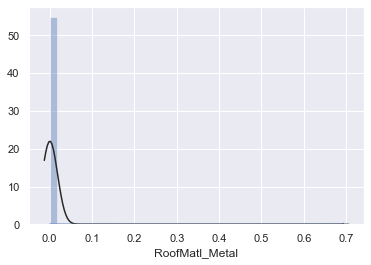

In [62]:
sns.distplot(train["RoofMatl_Metal"], fit=norm)

In [63]:
skew_columns.loc["PoolQC_Gd"]

Skew   -19.045943
Name: PoolQC_Gd, dtype: float64

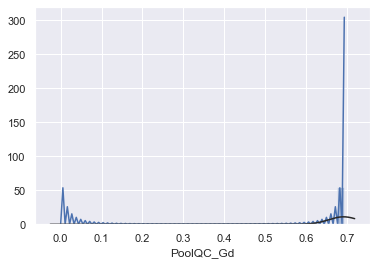

In [64]:
sns.distplot(train["PoolQC_Gd"], fit=norm)

In [65]:
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7.0,5.0,2003.0,2003.0,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,1.0,0.000000,2.0,1.0,3.0,0.6

## Feature selection

In [66]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
#https://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold

In [67]:
variables=train.columns
variables

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=245)

### Variance Threshold

In [68]:
pd.DataFrame(train.var().sort_values(ascending=True)).T

,MiscFeature_TenC,Exterior1st_CBlock,Exterior2nd_CBlock,RoofMatl_Roll,Condition2_RRAe,Exterior1st_ImStucc,Exterior1st_AsphShn,Condition2_RRAn,Utilities_NoSeWa,Functional_Sev,Exterior2nd_Other,Condition2_PosA,Electrical_Mix,HeatingQC_Po,RoofMatl_Membran,ExterCond_Po,RoofMatl_Metal,Heating_OthW,RoofStyle_Shed,Exterior1st_Stone,PoolQC_Fa,MiscFeature_Othr,Neighborhood_Blueste,Condition2_PosN,Exterior1st_BrkComm,BsmtCond_Po,SaleType_Con,Condition1_RRNe,Condition2_RRNn,Foundation_Wood,Electrical_FuseP,GarageQual_Po,Exterior2nd_AsphShn,SaleType_Oth,PoolQC_Gd,LotConfig_FR3,SaleType_CWD,Heating_Wall,SaleCondition_AdjLand,MiscFeature_Shed,Exterior2nd_Stone,Condition1_RRNn,Functional_Maj2,RoofMatl_WdShake,SaleType_ConLw,SaleType_ConLI,Street_Pave,Condition2_Feedr,RoofMatl_WdShngl,Foundation_Stone,Heating_Grav,Exterior2nd_Brk Cmn,RoofStyle_Mansard,GarageCond_Po,HouseStyle_2.5Fin,Condition1_PosA,GarageCond_Gd,SaleType_ConLD,GarageType_CarPort,Neighborhood_NPkVill,Exterior2nd_ImStucc,LotShape_IR3,RoofMatl_Tar&Grv,HouseStyle_2.5Unf,Fence_MnWw,RoofStyle_Gambrel,Neighborhood_Veenker,Condition1_RRAe,SaleCondition_Alloca,LandSlope_Sev,HouseStyle_1.5Unf,GarageQual_Gd,BsmtFinType2_GLQ,ExterQual_Fa,Functional_Mod,Condition2_Norm,Neighborhood_BrDale,MSZoning_RH,Neighborhood_MeadowV,Heating_GasW,Condition1_PosN,GarageType_Basment,SaleCondition_Family,FireplaceQu_Po,Foundation_Slab,KitchenAbvGr,Neighborhood_StoneBr,Neighborhood_SWISU,Exterior2nd_BrkFace,Exterior1st_Stucco,RoofMatl_CompShg,Exterior1st_WdShing,Exterior2nd_Stucco,Condition1_RRAn,Electrical_FuseF,ExterCond_Fa,Neighborhood_ClearCr,PavedDrive_P,BldgType_2fmCon,Functional_Min1,Heating_GasA,BsmtFinType2_BLQ,FireplaceQu_Fa,Functional_Min2,GarageCond_Fa,BsmtQual_Fa,LandContour_Low,HouseStyle_SFoyer,Neighborhood_IDOTRR,Neighborhood_Timber,Exterior2nd_Wd Shng,KitchenQual_Fa,LotShape_IR2,Alley_Pave,Neighborhood_NoRidge,BldgType_Twnhs,BsmtFinType2_LwQ,LotConfig_FR2,GarageQual_Fa,HeatingQC_Fa,Neighborhood_Mitchel,Exterior1st_BrkFace,LandContour_HLS,Neighborhood_Crawfor,BldgType_Duplex,GarageCond_TA,BsmtFinType2_Rec,Fence_GdWo,Neighborhood_BrkSide,Neighborhood_SawyerW,Exterior2nd_CmentBd,Exterior1st_CemntBd,MSZoning_FV,BsmtCond_Gd,HouseStyle_SLvl,LandSlope_Mod,GarageQual_TA,Neighborhood_NWAmes,Neighborhood_Sawyer,BsmtFinType1_LwQ,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Feedr,BsmtHalfBath,Neighborhood_Somerst,GarageType_BuiltIn,LotConfig_CulDSac,CentralAir_Y,Functional_Typ,Neighborhood_Edwards,Exterior1st_Plywood,BsmtCond_TA,Neighborhood_OldTown,BldgType_TwnhsE,BsmtExposure_Mn,PavedDrive_Y,SaleType_New,Fence_MnPrv,SaleCondition_Partial,Electrical_SBrkr,MasVnrType_Stone,BsmtFinType1_Rec,BsmtExposure_Gd,Exterior2nd_Plywood,ExterCond_Gd,BsmtFinType1_BLQ,LandContour_Lvl,Neighborhood_CollgCr,BsmtFinType2_Unf,ExterCond_TA,SaleType_WD,Exterior2nd_Wd Sdng,Condition1_Norm,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,MSZoning_RM,Exterior1st_MetalSd,Exterior1st_HdBoard,Neighborhood_NAmes,HeatingQC_Gd,SaleCondition_Normal,RoofStyle_Hip,MSZoning_RL,FireplaceQu_TA,RoofStyle_Gable,GarageType_Detchd,FireplaceQu_Gd,LotConfig_Inside,BsmtFinType1_GLQ,GarageFinish_RFn,HeatingQC_TA,1stFlrSF,MasVnrType_BrkFace,HouseStyle_2Story,LotFrontage,BsmtFinType1_Unf,BsmtExposure_No,GrLivArea,PoolArea,ExterQual_Gd,Exterior2nd_VinylSd,GarageType_Attchd,Exterior1st_VinylSd,LotShape_Reg,ExterQual_TA,KitchenQual_Gd,MasVnrType_None,BsmtQual_Gd,Foundation_CBlock,Foundation_PConc,BsmtQual_TA,GarageFinish_Unf,KitchenQual_TA,HouseStyle_1Story,HalfBath,LotArea,BsmtFullBath,FullBath,Fireplaces,3SsnPorch,MSSubClass,GarageCars,LowQualFinSF,BedroomAbvGr,OverallCond,TotalBsmtSF,MiscVal,YrSold,OverallQual,ScreenPorch,TotRmsAbvGrd,EnclosedPorch,BsmtFinSF2,BsmtUnfSF,OpenPorchSF,WoodDeckSF,MasVnrArea,MoSold,BsmtFinSF1,2ndFlrSF,YearRemodAdd,GarageYrBlt,YearBuilt,GarageArea
0,0.000329,0.000329,0.000329,0.000329,0.000329,0.000329,0.000329,0.000329,0.000329,0.000329,0.000329,0.000329,0.000329,0.000329,0.000329,0.000329,0.000329,

In [69]:
from sklearn.feature_selection import VarianceThreshold
X = train
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_vt = vt.fit_transform(X)
print(vt.get_params())
print(vt.get_support(indices=True))


{'threshold': 0.15999999999999998}
[  0   2   3   4   5   6   7   8   9  10  11  13  14  16  18  19  20  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  44  99 128 143 147
 150 151 156 157 162 163 195 196 207 213]


In [70]:
train_reduced_by_variance = train[train.columns[vt.get_support(indices=True)]]
train_reduced_by_variance

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotShape_Reg,HouseStyle_1Story,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_None,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageFinish_Unf
0,4.110874,9.042040,7.0,5.0,2003.0,2003.0,5.283204,6.561031,0.000000,5.017280,6.753438,6.751101,0.0,1.0,2.0,1.0,3.0,8.0,0.0,2003.0,2.0,548.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,2.0,2008.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,3.044522,9.169623,6.0,8.0,1976.0,1976.0,0.000000,6.886532,0.000000,5.652489,7.141245,0.000000,0.0,0.0,2.0,0.0,3.0,6.0,1.0,1976.0,2.0,460.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,5.0,2007.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,4.110874,9.328212,7.0,5.0,2001.0,2002.0,5.093750,6.188264,0.000000,6.075346,6.825460,6.765039,0.0,1.0,2.0,1.0,3.0,6.0,1.0,2001.0,2.0,608.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,9.0,2008.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.262680,9.164401,7.0,5.0,1915.0,1970.0,0.000000,5.379897,0.000000,6.293419,6.629363,6.629363,0.0,1.0,1.0,0.0,3.0,7.0,1.0,1998.0,3.0,642.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,2.0,2006.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,4.110874,9.565284,8.0,5.0,2000.0,2000.0,5.860786,6.486161,0.000000,6.196444,7.044033,6.960348,0.0,1.0,2.0,1.0,4.0,9.0,1.0,2000.0,3.0,836.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12.0,2008.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,8.976894,6.0,5.0,1999.0,2000.0,0.000000,0.000000,0.000000,6.860664,6.860664,6.543912,0.0,0.0,2.0,1.0,3.0,7.0,1.0,1999.0,2.0,460.0,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,8.0,2007.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1456,3.044522,9.486152,6.0,6.0,1978.0,1988.0,4.787492,6.673298,5.099866,6.380123,7.341484,0.000000,0.0,1.0,2.0,0.0,3.0,7.0,2.0,1978.0,2.0,500.0,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.0,2010.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1457,4.262680,9.109746,7.0,9.0,1941.0,2006.0,0.000000,5.620401,0.000000,6.777647,7.050123,7.050123,0.0,0.0,2.0,0.0,4.0,9.0,2.0,1941.0,1.0,252.0,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,5.0,2010.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1458,3.044522,9.181735,5.0,6.0,1950.0,1996.0,0.000000,3.912023,6.937314,0.000000,6.983790,0.000000,0.0,1.0,1.0,0.0,2.0,5.0,0.0,1950.0,1.0,240.0,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,4.0,2010.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [71]:
train = train_reduced_by_variance

### Correlations

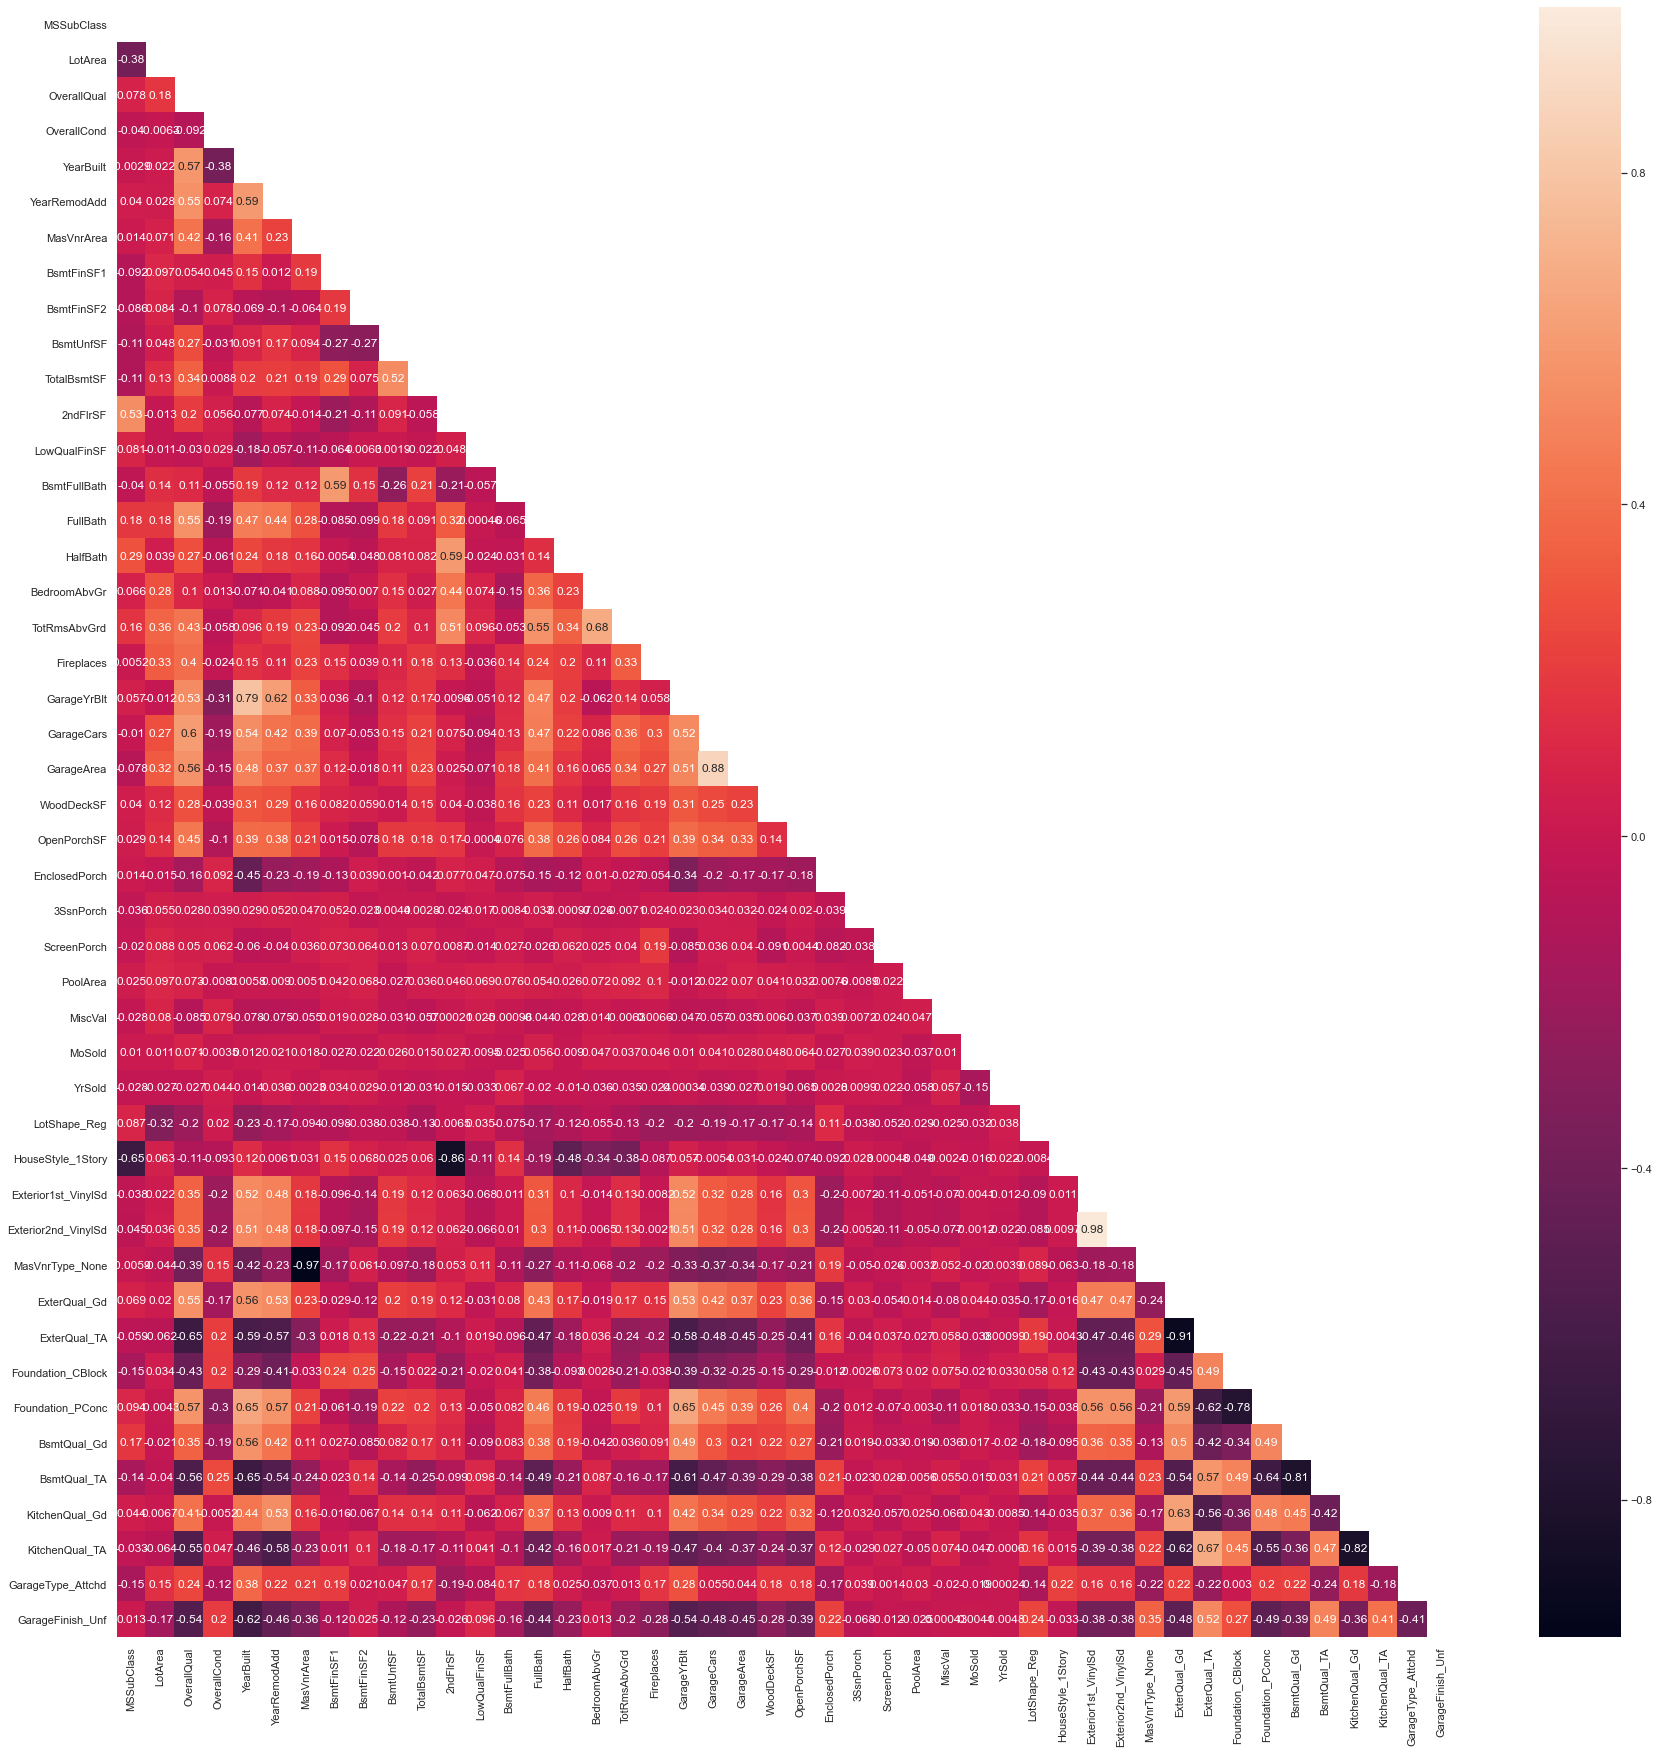

In [83]:
plt.subplots(figsize=(30,30))
matrix = np.triu(train.corr())
sns_plot = sns.heatmap(train.corr(), annot=True, mask=matrix)
fig = sns_plot.get_figure()
fig.savefig("corr_matrix.jpg")

### Corralation against Target

In [75]:
train_target = pd.concat([train,target],axis=1)

In [76]:
corr_target = train_target[train_target.columns].corr()['SalePrice'][:-1]
pd.DataFrame(corr_target.sort_values(ascending=False)).T

,OverallQual,GarageCars,GarageArea,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Foundation_PConc,GarageYrBlt,Fireplaces,ExterQual_Gd,OpenPorchSF,MasVnrArea,LotArea,TotalBsmtSF,KitchenQual_Gd,WoodDeckSF,Exterior2nd_VinylSd,Exterior1st_VinylSd,HalfBath,BsmtQual_Gd,GarageType_Attchd,BsmtFullBath,BsmtUnfSF,BsmtFinSF1,BedroomAbvGr,2ndFlrSF,ScreenPorch,PoolArea,3SsnPorch,MoSold,YrSold,MSSubClass,LowQualFinSF,BsmtFinSF2,HouseStyle_1Story,MiscVal,OverallCond,EnclosedPorch,LotShape_Reg,Foundation_CBlock,MasVnrType_None,BsmtQual_TA,GarageFinish_Unf,KitchenQual_TA,ExterQual_TA
SalePrice,0.790982,0.640409,0.623431,0.560664,0.533723,0.522897,0.507101,0.497734,0.480837,0.466929,0.452466,0.42997,0.412595,0.388528,0.325883,0.321641,0.32145,0.306389,0.305009,0.284108,0.234822,0.232192,0.227122,0.186572,0.185472,0.168213,0.167849,0.09391,0.0937,0.047322,0.046432,-0.028923,-0.034217,-0.044358,-0.048267,-0.061811,-0.063495,-0.077856,-0.176065,-0.267672,-0.343263,-0.367456,-0.498545,-0.513906,-0.519298,-0.589044


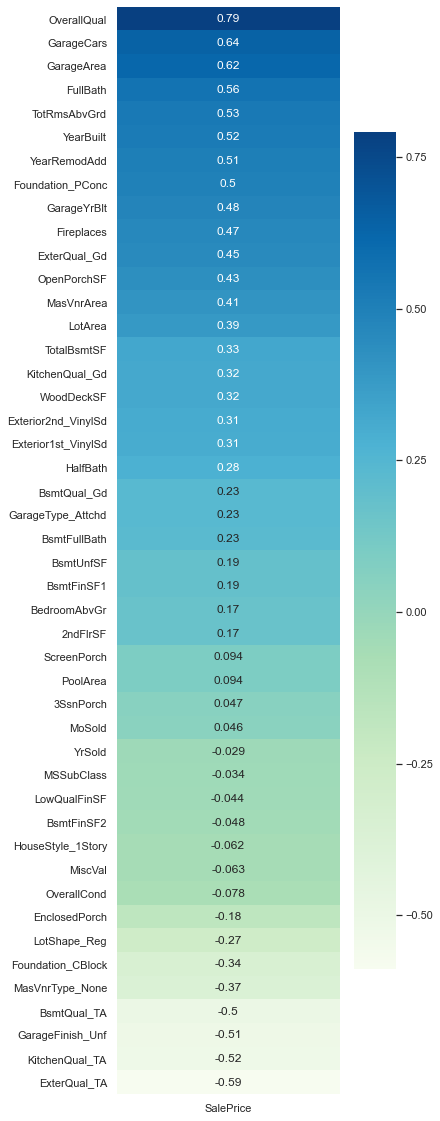

In [81]:
plt.subplots(figsize=(5,20))
sns_plot = sns.heatmap(corr_target.sort_values(ascending=False).to_frame(),annot=True, annot_kws={'size':12},cmap="GnBu")
plt.show()
fig = sns_plot.get_figure()
fig.savefig("corr_target.jpg")

In [82]:
sns.set_context('notebook')
sns.set_style('white')
#sns.pairplot(train, plot_kws=dict(alpha=.1, edgecolor='none'))
sns.pairplot(train)
fig = sns_plot.get_figure()
fig.savefig("pairplot.png")

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000018AA30D3B88> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000018AA31B05E8> (for post_execute):


KeyboardInterrupt: 

# Test set cleaning and feature engineering

In [ ]:
train

In [ ]:
y = target

In [ ]:
X = train
X = X.select_dtypes(include=['float64'])

In [ ]:
test = pd.read_csv('test.csv')
test_index = test["Id"]
test_index

In [ ]:
test = test.drop(columns="Id", axis=1)
test

In [ ]:
test.describe()

In [ ]:
floats_with_nulls = pd.DataFrame(test.select_dtypes(include=['float64']).isnull().sum()) > 0
floats_with_nulls = floats_with_nulls[floats_with_nulls[0] == True].T.columns
floats_with_nulls

In [ ]:
floats_without_nulls = choose_imputer_and_visualise_floats(dataframe=train
                                                           ,variables=floats_with_nulls
                                                           ,target=None
                                                           ,imputer=KNNImputer
                                                           ,strategy=None
                                                           ,weights="distance")
floats_without_nulls

In [ ]:
floats_without_nulls

In [ ]:
floats_without_nulls["MasVnrArea"].describe()

In [ ]:
pd.DataFrame(floats_without_nulls.isnull().sum() > 0).T

In [ ]:
category_with_nulls = pd.DataFrame(test.select_dtypes(include=['object']).isnull().sum()) > 0
category_with_nulls = category_with_nulls[category_with_nulls[0] == True].T.columns
category_with_nulls

In [ ]:
category_without_nulls = choose_imputer_and_visualise_categories(dataframe=test
                                                                ,variables=category_with_nulls
                                                                ,target=None
                                                                ,imputer=SimpleImputer
                                                                ,strategy="most_frequent"
                                                                ,weights=None)
category_without_nulls

In [ ]:
category_without_nulls["Utilities"].unique()

In [ ]:
pd.DataFrame(category_without_nulls.isnull().sum() > 0).T

In [ ]:
floats_without_nulls.columns

In [ ]:
floats_without_nulls

In [ ]:
floats_without_nulls.columns

In [ ]:
floats_without_nulls["MasVnrArea"].describe()

In [ ]:
test[floats_without_nulls.columns] = floats_without_nulls
test

In [ ]:
test["MasVnrArea"].describe()

In [ ]:
category_without_nulls.columns

In [ ]:
category_without_nulls.describe()

In [ ]:
test[category_without_nulls.columns] = category_without_nulls
test

In [ ]:
categories = pd.DataFrame(test.select_dtypes(include=['object']))
categories

In [ ]:
(pd.DataFrame(categories.select_dtypes(include=['object']).isnull().sum()) > 0).T

In [ ]:
categories.describe()

### One-hot encoding

In [ ]:
one_hot_encode_cols = categories.dtypes[categories.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
pd.DataFrame(one_hot_encode_cols).T

In [ ]:
test

In [ ]:
test = pd.get_dummies(data=test
                       ,columns=one_hot_encode_cols
                       ,drop_first=True)

In [ ]:
test[test.select_dtypes(include=['uint8']).columns] = test[test.select_dtypes(include=['uint8']).columns].astype(float)

### Calculate skewness

In [ ]:
mask = test.dtypes == np.float
float_columns = test.columns[mask]

skew_limit = 0.75
skew_values = test[float_columns].skew()
skew_values

In [ ]:
skew_columns = (skew_values
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns={0:'Skew'})
                .query('abs(Skew) > {}'.format(skew_limit)))

skew_columns.T

### Log tranformation - Return the natural logarithm of one plus the input array

In [ ]:
for column in skew_columns.index.values:
    if column == "SalePrice":
        continue
    test[column] = test[column].apply(np.log1p)

In [ ]:
test

In [ ]:
test.describe()

In [ ]:
y

In [ ]:
pd.DataFrame(train.isnull().sum() > 0).T

### NULLS double check

In [ ]:
train.shape

In [ ]:
nulls = pd.DataFrame(train.isnull().sum()) > 0
nulls = nulls[nulls[0] == True].T.columns
nulls

In [ ]:
test.shape

In [ ]:
pd.DataFrame(test.isnull().sum() > 0).T

In [ ]:
nulls = pd.DataFrame(test.isnull().sum()) > 0
nulls = nulls[nulls[0] == True].T.columns
nulls

# Test model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = train[test.columns]

model = RandomForestRegressor(n_estimators=100, criterion="mae", max_depth=3, bootstrap=True, warm_start=True, random_state=0, n_jobs=-1)
model.fit(X, y)
preds = model.predict(test)

In [ ]:
# Save test predictions to file
output = pd.DataFrame({'Id': test_index,
                       'SalePrice': preds})
output.to_csv('submission.csv', index=False)

Your Best Entry 
Your submission scored 16473.18615, which is an improvement of your previous score of 16644.83089. Great job!

https://www.kaggle.com/c/home-data-for-ml-course

* ~~tytuly wykresow - nazwy kolumn z pominieciem targetu~~
* ~~zamiana kolumn po imputowaniu z pominieciem targetu~~
* ~~czy wykresy printuja dane po transformacji? int a nie float ?~~

* ~~TEKSTOWE:~~
* ~~kolumny kategorie do dummy variables in_place=True~~
* NUMERYCZNE
* deviation miara -- def add_deviation_feature(X, feature, category):
* ~~potraktowanie logarytmem skosne zmienne~~
* zmienne wyzszego rzedu - Polynomial Features in Scikit-Learn
* interakacje miedzy zmiennymi
* macierz korelacji 

* Brief description of the data set and a summary of its attributes
* Initial plan for data exploration
* Actions taken for data cleaning and feature engineering
* Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
* Formulating at least 3 hypothesis about this data
* Conducting a formal significance test for one of the hypotheses and discuss the results
* Suggestions for next steps in analyzing this data
* A paragraph that summarizes the quality of this data set and a request for additional data if needed